<a href="https://colab.research.google.com/github/Mrsth/Desicion-Tree/blob/master/Diabeties.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Diabiates prediction EDA**

In this EDA, diabeties prediction is done using Decision tree algorithm.
Decision tree algorithm is used because the outcome/label of the data is categorical in nature. I.e. Either diabetic or non diabetic.

Steps:


1.   Loading the data
2.   Checking for any null value
1.   Data visualization
2.   Model development
1.   Model Validation










In [189]:
import pandas as pd

**1) Loading the csv file**

In [190]:
df1 = pd.read_csv('/content/drive/My Drive/Colab Notebooks/Machine Learning/Decision Tree/diabetes.csv')
df1.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


**Displaying the dimension of dataframe**

In [191]:
print("{} Dimensional".format(df1.ndim))
print("{} shaped dataframe".format(df1.shape))

2 Dimensional
(768, 9) shaped dataframe


In [192]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [193]:
df1.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


**2) Checking null values**

In [194]:
df1.isna().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

From above result we can see that there are no null value in the dataframe.

**3) Data visualization**

In [195]:
import seaborn as sns
import matplotlib.pyplot as plt

df2 = pd.read_csv('/content/drive/My Drive/Colab Notebooks/Machine Learning/Decision Tree/diabetes.csv')
df2.replace({"Outcome":{0:"Non-Diabetic", 1:"Diabetic"}}, inplace=True)
df2.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,Diabetic
1,1,85,66,29,0,26.6,0.351,31,Non-Diabetic
2,8,183,64,0,0,23.3,0.672,32,Diabetic
3,1,89,66,23,94,28.1,0.167,21,Non-Diabetic
4,0,137,40,35,168,43.1,2.288,33,Diabetic


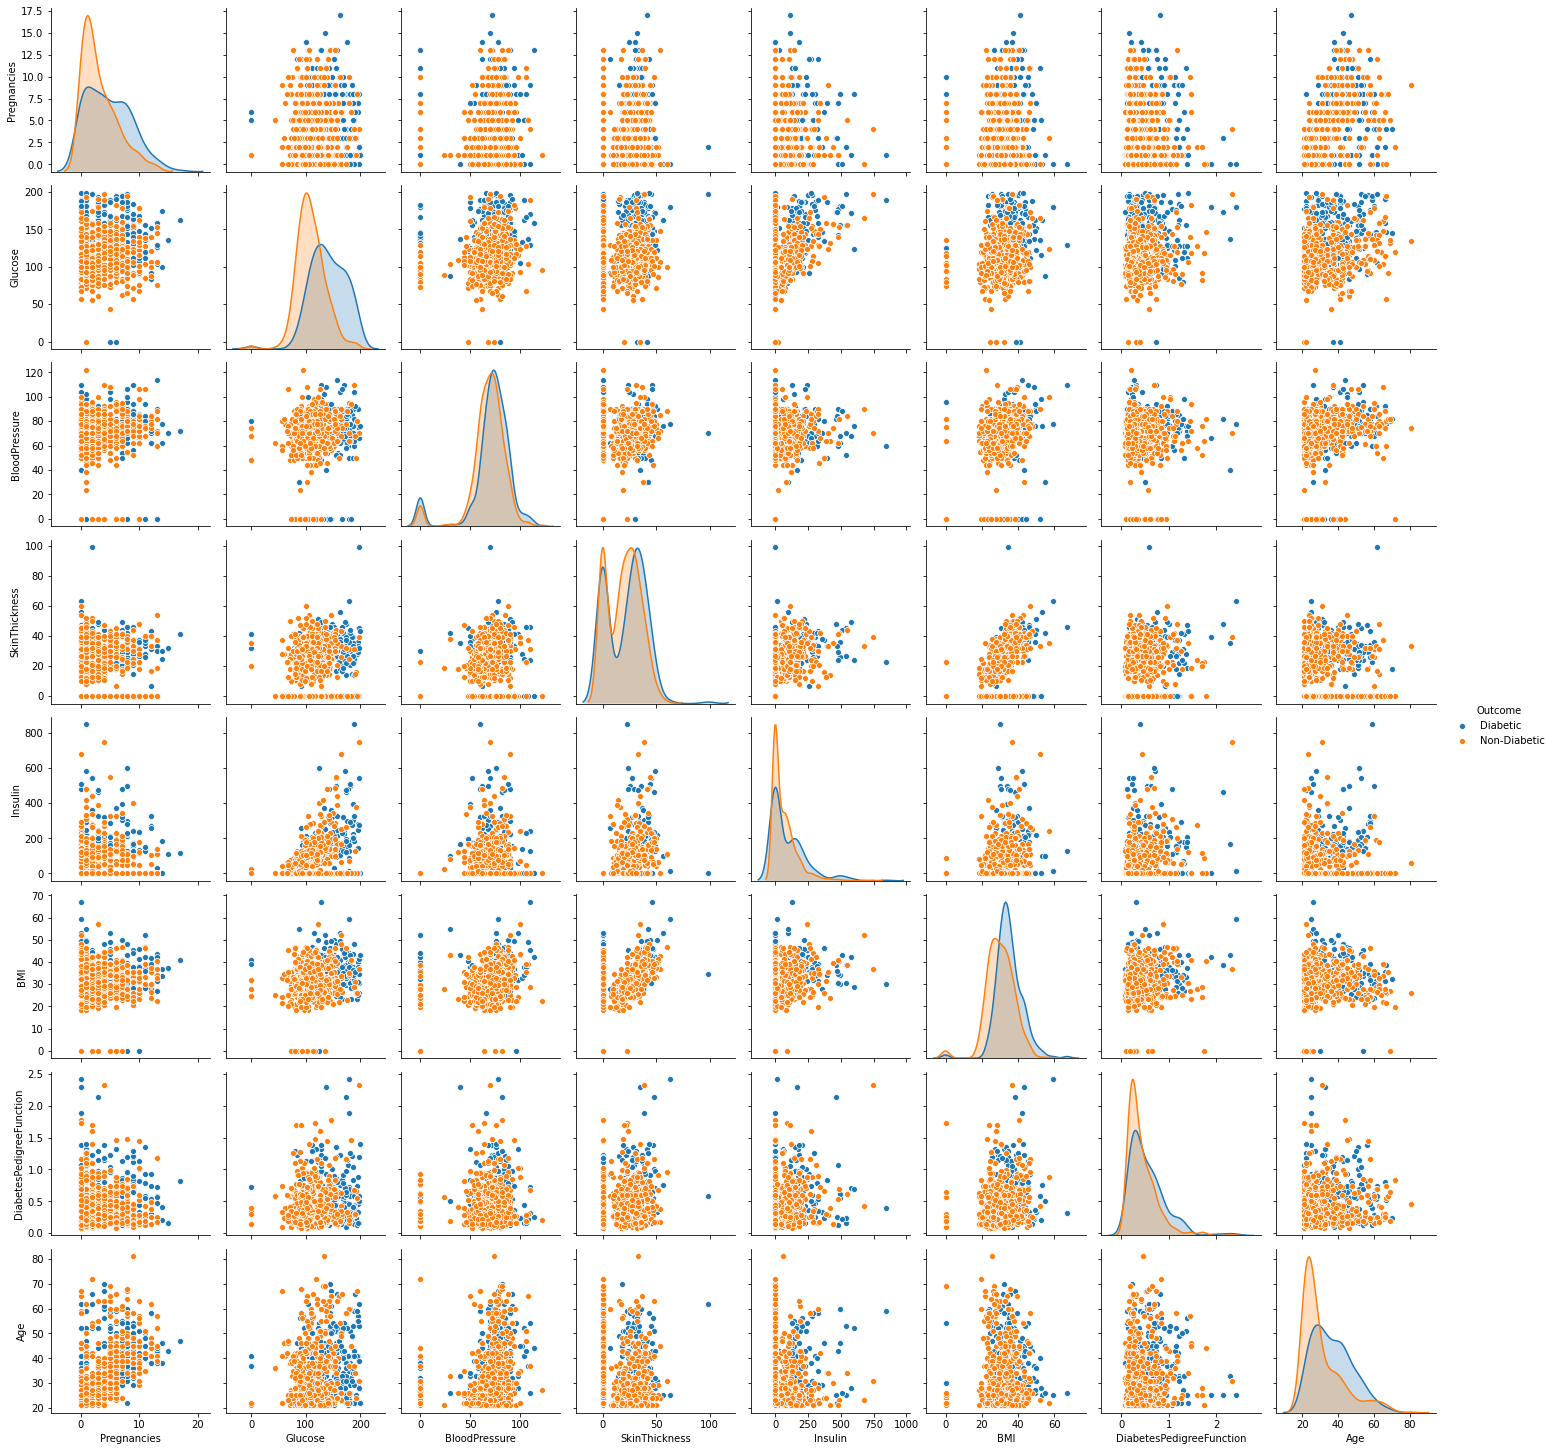

In [196]:
sns.pairplot(data=df2, hue="Outcome")

**Heatmap**

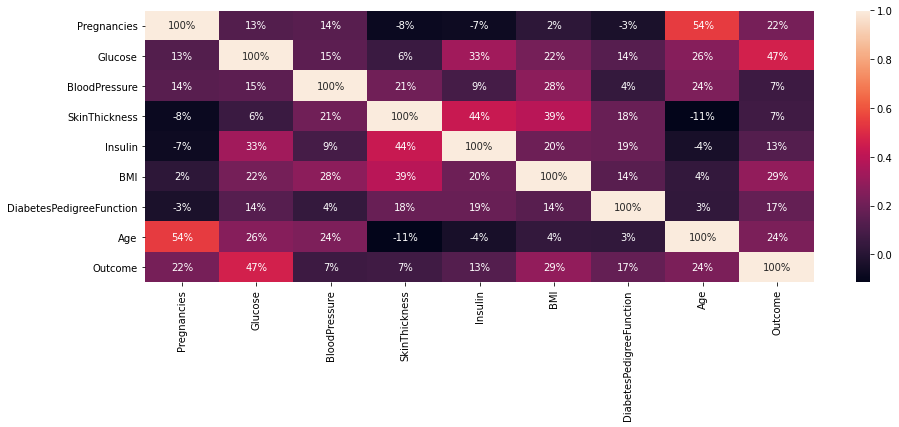

In [197]:
plt.figure(figsize=(15,5))
sns.heatmap(data=df1.corr(), annot=True, fmt='.0%')

**Which age of people are more diabetic?**

In [198]:
df3 = df2.loc[df2["Outcome"]== "Diabetic"]
df3.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,Diabetic
2,8,183,64,0,0,23.3,0.672,32,Diabetic
4,0,137,40,35,168,43.1,2.288,33,Diabetic
6,3,78,50,32,88,31.0,0.248,26,Diabetic
8,2,197,70,45,543,30.5,0.158,53,Diabetic


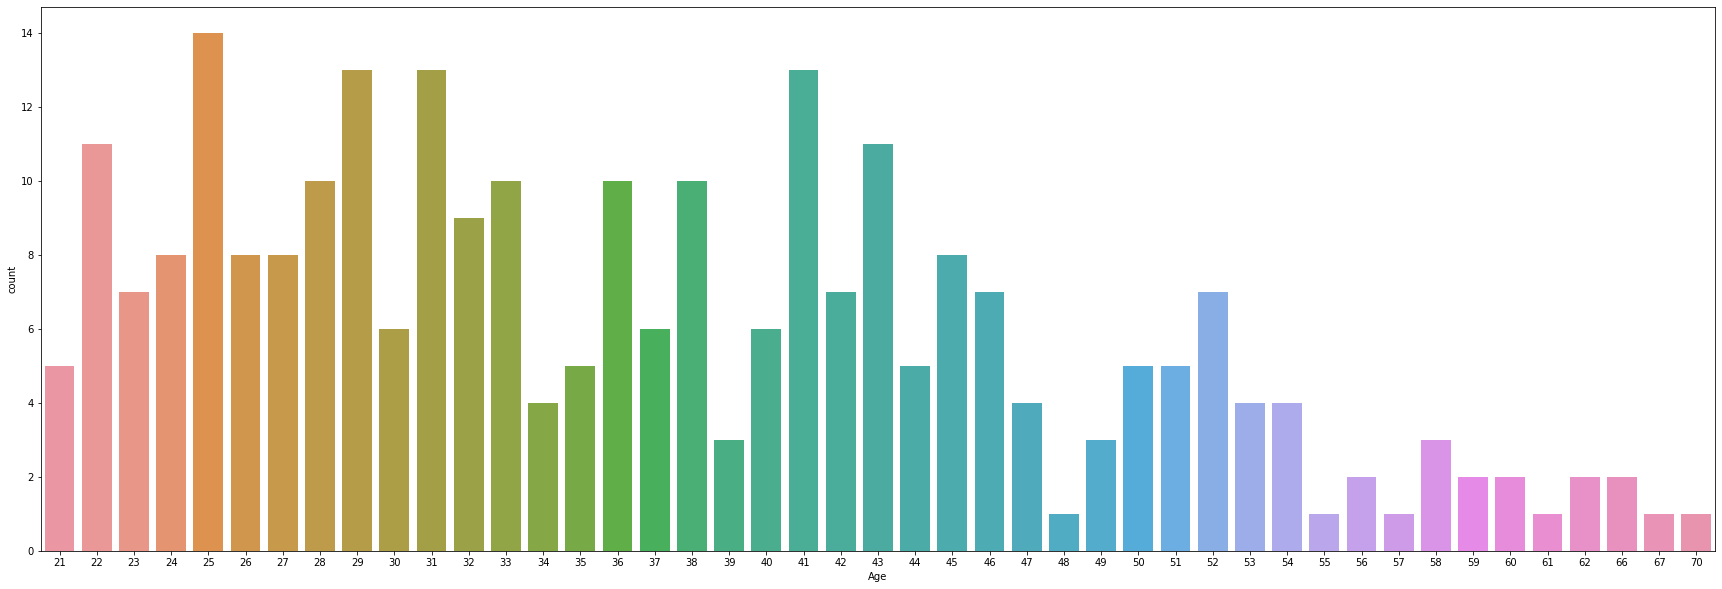

In [199]:
import matplotlib.pyplot as plt

plt.figure(figsize=(30,10))
sns.countplot(data=df3, x="Age")

**Conclusion:** People at age 25 are more diabetic than other age group

**Relation between diabeties and pregnancy**

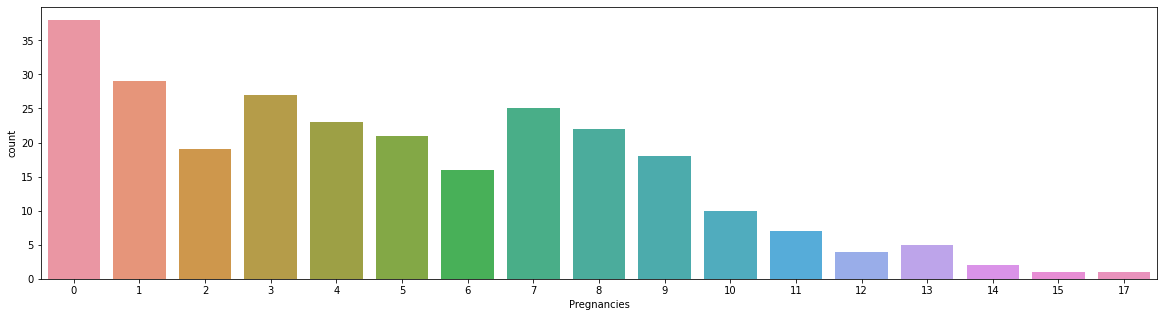

In [200]:
plt.figure(figsize=(20,5))
sns.countplot(data=df3, x="Pregnancies")

**Conclusion:** More women become diabetic at the earlier stage of the pregnancy.

**4) Model development**

In [201]:
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.tree import DecisionTreeClassifier

In [202]:
df1.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


**Selecting features and labels**

In [203]:
features = df1.iloc[:,0:-1]
labels = df1["Outcome"]

**Splitting data into trainning and testing data**

In [214]:
x_train, x_test, y_train, y_test = train_test_split(features,labels)

model = DecisionTreeClassifier()
model.fit(x_train,y_train)
prediction = model.predict(x_test)

In [205]:
dict1 = {"y_test": y_test, "Prediction": prediction}
df4 = pd.DataFrame(dict1)
df4

,y_test,Prediction
459,0,0
491,0,0
730,1,0
736,0,0
392,0,0
...,...,...
673,0,1
537,0,1
681,1,1
396,0,0


**5) Model Validation**

In [206]:
import math
print("Root Mean Square Error = ", math.sqrt(metrics.mean_squared_error(df4["y_test"],df4["Prediction"])))
print("Mean Square Error = ", metrics.mean_squared_error(df4["y_test"],df4["Prediction"]))

Root Mean Square Error =  0.5818433351570392
Mean Square Error =  0.3385416666666667


In [207]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

print(classification_report(df4["y_test"],df4["Prediction"]))

              precision    recall  f1-score   support

           0       0.77      0.71      0.74       130
           1       0.48      0.56      0.52        62

    accuracy                           0.66       192
   macro avg       0.63      0.64      0.63       192
weighted avg       0.68      0.66      0.67       192



In [208]:
print("Model accuracy = ", accuracy_score(df4["y_test"],df4["Prediction"]))

Model accuracy =  0.6614583333333334


In [225]:
print("Enter the parameters....")
preg = input("Week of pregnancy = ")
glucose = input("Glucose level = ")
bp = input("Blood pressure = ")
sk = input("Skin thickness = ")
insulin = input("Insulin level = ")
bmi = input("BMI level = ")
dpf = input("DiabetesPedigreeFunction = ")
age = input("Age = ")

test_dict = {
    "Pregnancies": [preg],
    "Glucose": [glucose],
    "BloodPressure":[bp],
    "SkinThickness":[sk],
    "Insulin":[insulin], 
    "BMI":[bmi], 
    "DiabetesPedigreeFunction":[dpf], 
    "Age":[age]
}

test = pd.DataFrame(test_dict)

Enter the parameters....
Week of pregnancy = 0
Glucose level = 148
Blood pressure = 64
Skin thickness = 35
Insulin level = 0
BMI level = 33.6
DiabetesPedigreeFunction = 0.672
Age = 33


In [ ]:
#6	148	72	35	0	   33.6	 0.627	50
#8	183	64	0	  0	   23.3	 0.672	32
#0	137	40	35	168	 43.1	 2.288	33

In [226]:
test_predict = model.predict(test)
if test_predict[0] == 0:
  print("You don't have any diabeties")
elif test_predict[0] == 1:
  print("You have diabeties")  

You have diabeties
